# EC7212: Computer Vision and Image Processing - Assignment 02

Author: Thayanan T.
Reg No: EG/2020/4237
Date: 27/06/2025

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Add Gaussian Noise and Apply Otsu’s Algorithm

### Step 1: Create Original Image with Two Objects

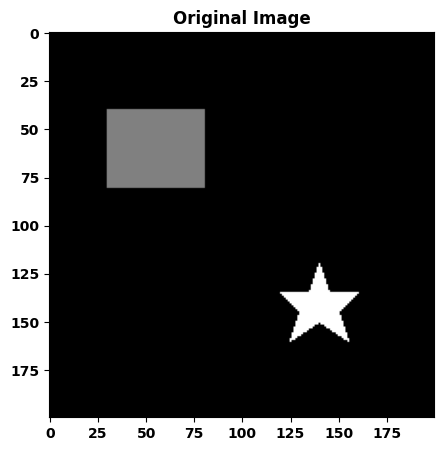

In [56]:
# Create synthetic image
image = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(image, (30, 40), (80, 80), 80, -1)  # Object 1 (rectangle)
star_pts = np.array([
    [140, 120], [145, 135], [160, 135], [150, 145],
    [155, 160], [140, 150], [125, 160], [130, 145],
    [120, 135], [135, 135]
], np.int32)
cv2.fillPoly(image, [star_pts], 160)  # Object 2 (star)
cv2.imwrite('output/original_image.png', image)

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('on')
plt.show()

### Step 2: Add Gaussian Noise

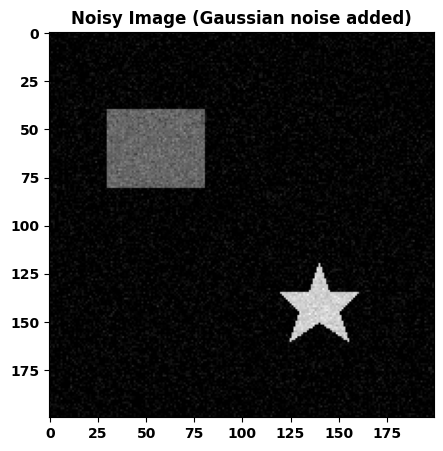

In [57]:
mean = 0
std_dev = 10
noise = np.random.normal(mean, std_dev, image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
cv2.imwrite('output/noisy_image.png', noisy_image)

plt.figure(figsize=(5, 5))
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian noise added)")
plt.axis('on')
plt.show()

### Step 3: Apply Otsu’s Thresholding

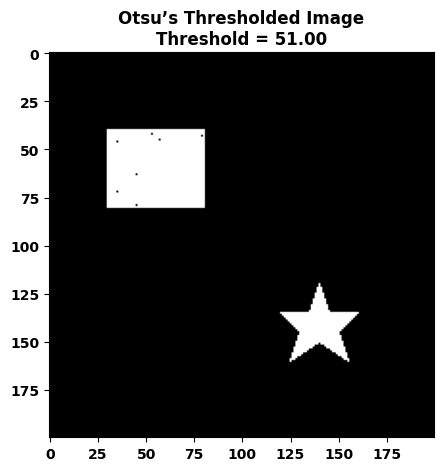

In [58]:
threshold_val, otsu_image = cv2.threshold(
    noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
cv2.imwrite('output/otsu_image.png', otsu_image)

plt.figure(figsize=(5, 5))
plt.imshow(otsu_image, cmap='gray')
plt.title(f"Otsu’s Thresholded Image\nThreshold = {threshold_val:.2f}")
plt.axis('on')
plt.show()

## Task 2: Region Growing Image Segmentation

In [59]:
# Region Growing Function
def region_growing(img, seeds, threshold=20):
    h, w = img.shape
    visited = np.zeros_like(img, dtype=bool)
    result = np.zeros_like(img, dtype=np.uint8)

    for seed in seeds:
        x0, y0 = seed
        seed_val = img[x0, y0]
        stack = [(x0, y0)]

        while stack:
            x, y = stack.pop()
            if visited[x, y]:
                continue
            visited[x, y] = True
            result[x, y] = 255

            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    if dx == 0 and dy == 0:
                        continue
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < h and 0 <= ny < w:
                        if not visited[nx, ny]:
                            if abs(int(img[nx, ny]) - int(seed_val)) <= threshold:
                                stack.append((nx, ny))
    return result

### Step 4: Apply Region Growing Algorithm

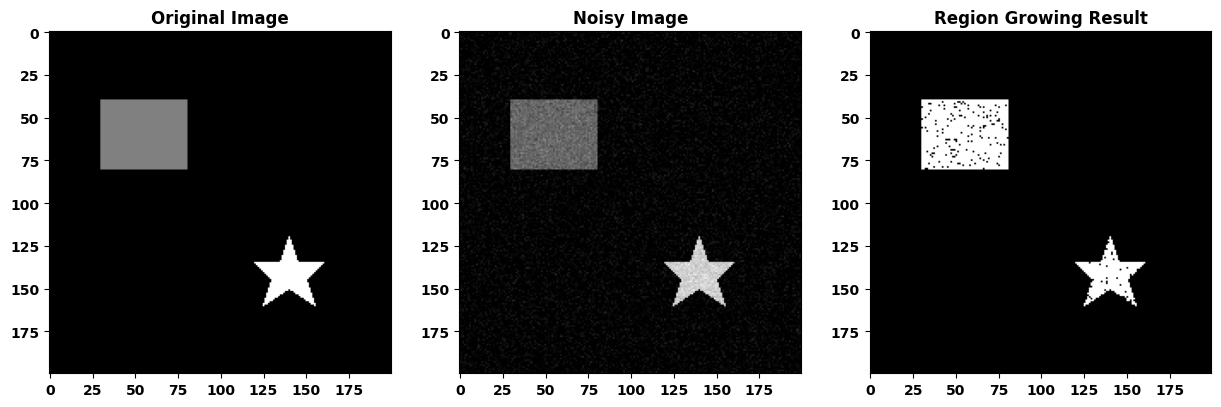

In [ ]:
# Define seed points
seed_points = [(60, 60), (140, 140)]
region_image = region_growing(noisy_image, seed_points, threshold=20)
cv2.imwrite('output/region_growing_result.png', region_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(region_image, cmap='gray')
plt.title("Region Growing Result")
plt.axis('on')

plt.show()